<a href="https://colab.research.google.com/github/jgxuann/Prisoners-Dilemma-Data-Analysis/blob/main/ijhcs_figure_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 数据分析的安装包
install.packages(c("readxl", "dplyr", "lme4", "lmerTest"))
# 加载包
library(readxl)
library(dplyr)
library(lme4)
library(lmerTest)
library(emmeans)
library(ggplot2)
# 读取Excel文件（文件路径需根据实际情况修改）
data <- read_excel("prisoner_data_analysis_1.xlsx", sheet = "R")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error in library(emmeans): there is no package called ‘emmeans’


In [ ]:
# 加载所需 R 包
library(readxl)    # 用于读取 Excel 文件
library(dplyr)     # 用于数据处理
library(lme4)      # 用于线性混合效应模型
library(lmerTest)  # 用于获取线性混合效应模型的显著性检验结果

# 读取 Excel 数据并进行初步预处理
data <- read_excel("prisoner_data_analysis_1.xlsx", sheet = "R") %>%
  filter(Model_type != "Human") %>%  # 过滤掉 Model_type 为 "Human" 的数据
  mutate(
    Sex = factor(Sex, levels = c("M", "F")),  # 将 Sex 转换为因子变量，指定水平顺序
    Model_type = factor(
      Model_type,
      levels = c("Purported Human", "Purported Rule-Based Agents", "Purported LLM Agents")  # 指定因子水平顺序
    ),
    Time = as.numeric(Time),  # 将 Time 列转换为数值型
    ID = as.factor(ID)        # 将 ID 转换为因子变量，表示随机效应
  )

# 定义函数以分析性别的主效应
analyze_sex_effect <- function(dv) {
  # 构建公式：因变量 ~ Sex + 随机效应
  formula <- as.formula(paste(dv, "~ Sex + (1|ID)"))

  # 针对 Time 变量处理缺失值
  if (dv == "Time") {
    data_dv <- data %>% filter(!is.na(Time))  # 过滤掉 Time 中的缺失值
  } else {
    data_dv <- data  # 其他因变量直接使用完整数据
  }

  # 拟合线性混合效应模型
  model <- lmer(formula, data = data_dv, REML = TRUE)

  # 提取性别主效应的 p 值和 F 值
  anova_results <- anova(model)
  f_value <- anova_results["Sex", "F value"]
  p_value <- anova_results["Sex", "Pr(>F)"]

  return(c(f_value, p_value))
}

# 定义函数以分析模型类型的主效应
analyze_model_effect <- function(dv) {
  # 构建公式：因变量 ~ Model_type + 随机效应
  formula <- as.formula(paste(dv, "~ Model_type + (1|ID)"))

  # 针对 Time 变量处理缺失值
  if (dv == "Time") {
    data_dv <- data %>% filter(!is.na(Time))  # 过滤掉 Time 中的缺失值
  } else {
    data_dv <- data  # 其他因变量直接使用完整数据
  }

  # 拟合线性混合效应模型
  model <- lmer(formula, data = data_dv, REML = TRUE)

  # 提取模型类型主效应的 F 值和 p 值
  anova_results <- anova(model)
  f_value <- anova_results["Model_type", "F value"]
  p_value <- anova_results["Model_type", "Pr(>F)"]

  return(c(f_value, p_value))
}

# 定义函数以分析交互效应
analyze_interaction_effect <- function(dv) {
  # 构建公式：因变量 ~ Sex * Model_type + 随机效应
  formula <- as.formula(paste(dv, "~ Sex * Model_type + (1|ID)"))

  # 使用完整数据集
  data_dv <- data

  # 拟合线性混合效应模型
  model <- lmer(formula, data = data_dv, REML = TRUE)

  # 提取交互效应的 F 值和 p 值
  anova_results <- anova(model)
  f_value <- anova_results["Sex:Model_type", "F value"]
  p_value <- anova_results["Sex:Model_type", "Pr(>F)"]

  return(c(f_value, p_value))
}

# 定义因变量列表（包括所有需要分析的变量）
variables <- c("Cooperate", "Time", "Be_Friendly", "Repair_Effort")

# 分析性别的主效应，返回 F 值和 p 值
sex_results <- t(sapply(variables, analyze_sex_effect))

# 分析模型类型的主效应，返回 F 值和 p 值
model_results <- t(sapply(variables, analyze_model_effect))

# 分析交互效应，返回 F 值和 p 值
interaction_results <- t(sapply(variables, analyze_interaction_effect))

# 合并所有分析结果到一个数据框
final_table <- data.frame(
  Variable = variables,           # 因变量名称
  Sex_F = sex_results[, 1],       # 性别主效应 F 值
  Sex_p = sex_results[, 2],       # 性别主效应 p 值
  Model_type_F = model_results[, 1],  # 模型类型主效应 F 值
  Model_type_p = model_results[, 2],  # 模型类型主效应 p 值
  Interaction_F = interaction_results[, 1],  # 性别与模型类型交互效应 F 值
  Interaction_p = interaction_results[, 2]   # 性别与模型类型交互效应 p 值
)

# 输出结果
cat("=== 主效应和交互效应显著性结果（包括 F 值和 p 值） ===\n")
print(final_table, row.names = FALSE)


=== 主效应和交互效应显著性结果（包括 F 值和 p 值） ===
      Variable      Sex_F       Sex_p Model_type_F Model_type_p Interaction_F
     Cooperate  0.2049068 0.654277054     3.397911 4.022989e-02     8.6250166
          Time 12.5047902 0.001434603    26.096374 8.259891e-09     3.9626043
   Be_Friendly  0.3921250 0.536256467     1.221072 3.023819e-01     5.1389440
 Repair_Effort  0.8601792 0.361614779     4.000971 2.356497e-02     0.4432258
 Interaction_p
  0.0005428072
  0.0245722230
  0.0089318671
  0.6441946621


In [ ]:
# install.packages("emmeans")
# 加载包
library(readxl)
library(dplyr)
library(lme4)
library(lmerTest)
library(emmeans)

# 读取数据并预处理
data <- read_excel("prisoner_data_analysis_1.xlsx", sheet = "R") %>%
  filter(Model_type != "Human") %>%
  mutate(
    Sex = factor(Sex, levels = c("M", "F")),
    Model_type = factor(
      Model_type,
      levels = c("Purported Human", "Purported Rule-Based Agents", "Purported LLM Agents")
    ),
    Group = interaction(Sex, Model_type),  # 创建六组组合变量
    Time = as.numeric(Time),
    ID = as.factor(ID)
  )

# 定义分析函数（六组两两比较）
analyze_pairwise <- function(dv) {
  # 处理Time的缺失值
  if (dv == "Time") {
    data_dv <- data %>% filter(!is.na(Time))
  } else {
    data_dv <- data
  }

  # 构建模型公式：因变量 ~ Group + 随机效应
  formula <- as.formula(paste(dv, "~ Group + (1|ID)"))
  model <- lmer(formula, data = data_dv, REML = TRUE)

  # 计算六组的边际均值
  emm <- emmeans(model, ~ Group)

  # 执行两两比较（不校正p值）
  pairwise_results <- pairs(emm, adjust = "none")

  # 提取比较结果并格式化 p 值到五位小数
  comparison_df <- summary(pairwise_results)
  comparison_df$p.value <- format(comparison_df$p.value, digits = 5, nsmall = 5)
  comparison_df <- comparison_df %>% select(contrast, p.value, everything())

  return(list(
    model_summary = summary(model),
    comparison_df = comparison_df
  ))
}

# 分析Cooperate的六组两两比较, 这里可以更换其他因变量
cooperate_results <- analyze_pairwise("Cooperate")

# 打印模型摘要和两两比较结果
cat("=== 模型固定效应 ===\n")
print(cooperate_results$model_summary$coefficients)

cat("\n=== 六组两两比较（无校正），p 值为第二列且保留五位小数 ===\n")
print(cooperate_results$comparison_df)


ERROR: Error in library(emmeans): there is no package called ‘emmeans’


In [ ]:
# 加载所需 R 包
library(readxl)
library(dplyr)
library(lme4)
library(lmerTest)
library(emmeans)  # 用于事后比较

# 读取 Excel 数据并进行初步预处理
data <- read_excel("prisoner_data_analysis_1.xlsx", sheet = "R") %>%
  filter(Model_type != "Human") %>%
  mutate(
    Model_type = factor(
      Model_type,
      levels = c("Purported Human", "Purported Rule-Based Agents", "Purported LLM Agents")
    ),
    ID = as.factor(ID)
  )

# 构建线性混合效应模型
model <- lmer(Repair_Effort ~ Model_type + (1|ID), data = data, REML = TRUE)

# 输出模型摘要
summary_model <- summary(model)
print(summary_model)

# 进行方差分析以获取整体效应的显著性
anova_results <- anova(model)
print(anova_results)

# 进行事后比较，不使用Tukey调整
emmeans_result <- emmeans(model, pairwise ~ Model_type, adjust = "none")
print(emmeans_result)



ERROR: Error in library(emmeans): there is no package called ‘emmeans’


Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not foun

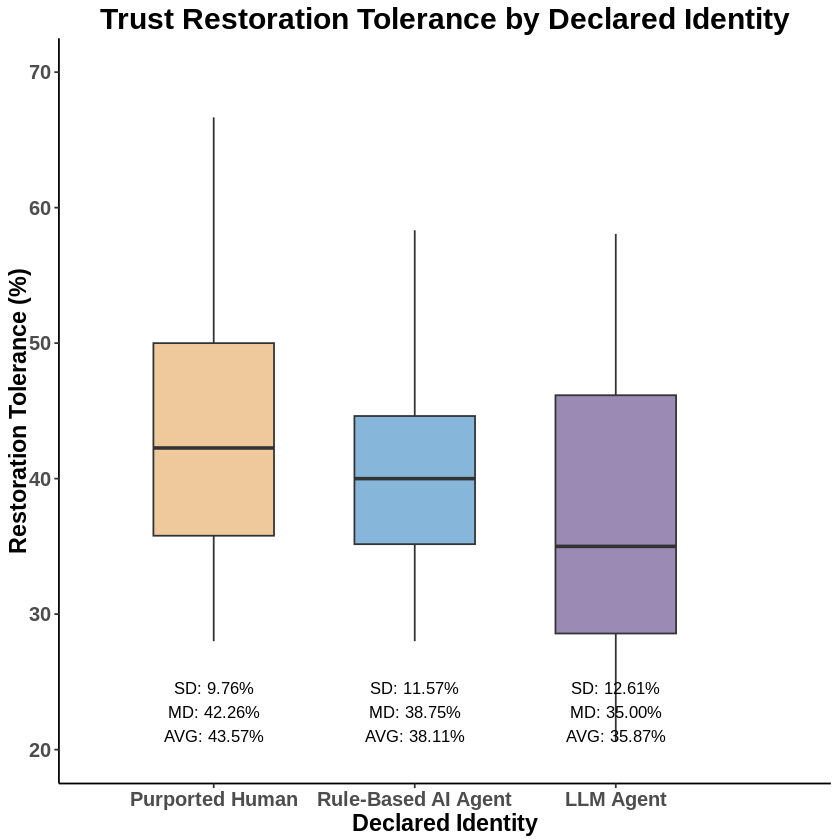

In [ ]:
# 加载所需 R 包
library(readxl)
library(dplyr)
library(ggplot2)

# 读取 Excel 数据并进行初步预处理
data <- read_excel("prisoner_data_analysis_1.xlsx", sheet = "R") %>%
  filter(Model_type != "Human") %>%
  mutate(
    Model_type = factor(
      Model_type,
      levels = c("Purported Human", "Purported Rule-Based Agents", "Purported LLM Agents")
    ),
    Repair_Effort = Repair_Effort * 100  # 转换为百分比
  )

# 计算每组的统计数据
stats <- data %>%
  group_by(Model_type) %>%
  summarise(
    SD = sd(Repair_Effort),
    MD = median(Repair_Effort),
    AVG = mean(Repair_Effort)
  )

# 自定义颜色
custom_colors <- c("#EFC99B", "#86B7DB", "#9A8AB4")

# 创建箱线图
p <- ggplot(data, aes(x = Model_type, y = Repair_Effort, fill = Model_type)) +
  geom_boxplot(outlier.shape = NA, width = 0.6) +  # 稍微增加箱的宽度
  theme_classic() +  # 使用经典主题，包含坐标轴但没有网格
  labs(title = "Trust Restoration Tolerance by Declared Identity",
       x = "Declared Identity",
       y = "Restoration Tolerance (%)") +
  scale_fill_manual(values = custom_colors) +  # 使用自定义颜色
  scale_x_discrete(labels = c("Purported Human", "Rule-Based AI Agent", "LLM Agent"),
                   expand = c(0.1, 0.3)) +  # 自定义x轴标签并增加间距
  scale_y_continuous(limits = c(20, 70), breaks = seq(20, 70, 10)) +  # 设置y轴范围从20%开始
  coord_cartesian(xlim = c(0.8, 3.5)) +  # 调整x轴的范围，使图形更窄
  theme(
    text = element_text(family = "Arial"),  # 设置所有文本为Arial字体
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold", family = "Arial"),  # 增加标题粗细
    axis.title = element_text(size = 14, family = "Arial", face = "bold"),
    axis.text = element_text(size = 12, family = "Arial", face = "bold"),
    legend.position = "none"
  ) +
  geom_text(data = stats, aes(x = Model_type, y = 25,
                              label = sprintf("SD: %.2f%%\nMD: %.2f%%\nAVG: %.2f%%", SD, MD, AVG)),
            size = 3.5, vjust = 1, family = "Arial")  # 设置统计文本为Arial字体，稍微减小字体大小

# 显示图形
print(p)

# 保存图形（可选）
ggsave("restoration.png", p, width = 7, height = 6, dpi = 300)


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


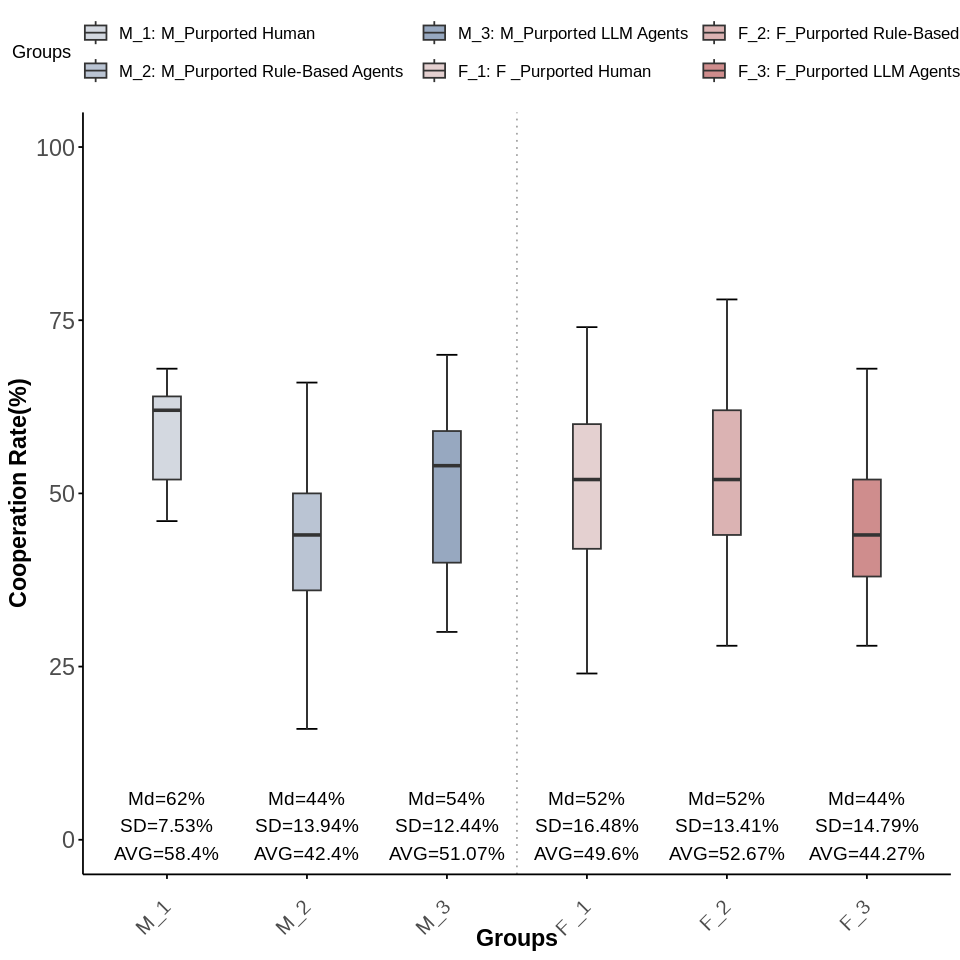

In [ ]:
# 确保过滤条件正确
df_filtered <- data %>%
  filter(Model_type != "Human")  # 过滤掉 Human

library(ggplot2)
library(dplyr)

# 假设 df_filtered 已经被正确过滤和分组
df_filtered$Group <- factor(
  interaction(df_filtered$Sex, df_filtered$Model_type, sep = "_"),
  levels = c(
    "M_Purported Human", "M_Purported Rule-Based Agents", "M_Purported LLM Agents",
    "F_Purported Human", "F_Purported Rule-Based Agents", "F_Purported LLM Agents"
  )
)

# 将 Be_Friendly 转换成百分比
df_filtered <- df_filtered %>%
  mutate(Cooperate = Cooperate * 100)

# 计算每组的 Md, SD, AVG (以百分数表示)
stats <- df_filtered %>%
  group_by(Group) %>%
  summarise(
    Md = median(Cooperate, na.rm = TRUE),
    SD = sd(Cooperate, na.rm = TRUE),
    AVG = mean(Cooperate, na.rm = TRUE),
    .groups = "drop"
  )

# 自定义颜色
custom_colors <- c(
  "M_Purported Human" = "#D3D8E0",
  "M_Purported Rule-Based Agents" = "#BAC4D3",
  "M_Purported LLM Agents" = "#97A8C0",
  "F_Purported Human" = "#E4D0D0",
  "F_Purported Rule-Based Agents" = "#DBB3B3",
  "F_Purported LLM Agents" = "#CF8D8D"
)

# 检查颜色和分组匹配
if (!all(levels(df_filtered$Group) %in% names(custom_colors))) {
  stop("Custom colors do not match the levels of Group.")
}

# 在原始代码中找到geom_boxplot部分，修改为：
p <- ggplot(df_filtered, aes(x = Group, y = Cooperate, fill = Group)) +
  stat_boxplot(
    geom = "errorbar",
    width = 0.15,
    size = 0.5,
    color = "black"
  ) +
  geom_boxplot(
    width = 0.2,
    alpha = 1,
    outlier.shape = NA
  ) +
  # 添加以下scale_x_discrete替换原来的
  scale_x_discrete(
    labels = c("M_1", "M_2", "M_3", "F_1", "F_2", "F_3"),
    expand = expansion(add = c(0.5, 1.5))  # 左边扩展0.5单位，右边扩展1.5单位
  ) +
  # 添加分组间隔线
  geom_vline(xintercept = 3.5, linetype = "dotted", color = "gray60", alpha = 0.9) +
  # 其他原有设置保持不变...

  # 自定义颜色
  scale_fill_manual(
    values = custom_colors,
    labels = c(
      "M_1: M_Purported Human",
      "M_2: M_Purported Rule-Based Agents",
      "M_3: M_Purported LLM Agents",
      "F_1: F _Purported Human",
      "F_2: F_Purported Rule-Based Agents",
      "F_3: F_Purported LLM Agents"
    )
  ) +
  # 自定义横坐标标签为 A, B, C, D, E, F
  scale_x_discrete(labels = c("M_1", "M_2", "M_3", "F _1", "F_2", "F_3")) +
  # 设置纵轴范围为 [0, 100]，去掉百分号
  scale_y_continuous(limits = c(0, 100), labels = scales::number_format(scale = 1)) +
  # 标题和坐标轴标签
  labs(
   # title = "Cooperation Rate by Gender and AI Declared Identity",
    x = "Groups",
    y = "Cooperation Rate(%)",
    fill = "Groups"
  ) +

  # 修改主题
  theme_minimal() +
  theme(
    #text = element_text(family = "Arial"),
    plot.title = element_text(hjust = 0.2, size = 18, face = "bold"),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    axis.text.x = element_text(
      size = 12,
      angle = 45,       # 向左倾斜45度
      hjust = 1,        # 右对齐（使标签底部靠近刻度线）
      vjust = 0.5       # 垂直居中
  ),
    axis.text.y = element_text(size = 14),
    panel.grid = element_blank(),  # 去掉网格线
    legend.position = "top",  # 图例放在顶部
    legend.text = element_text(size = 10),  # 增大图例文本字体
    # 添加横轴和纵轴线
    axis.line = element_line(color = "black"),  # 绘制轴线
    axis.ticks = element_line(color = "black")  # 添加刻度线
  )

# 添加每组的统计量到图中，并移到箱线图下方
p <- p + geom_text(
  data = stats,
  aes(
    x = Group,
    y = 2,  # 将文字放在图中下方
    label = paste0(
      "Md=", round(Md, 2), "%\n",
      "SD=", round(SD, 2), "%\n",
      "AVG=", round(AVG, 2), "%"
    )  # 格式化显示数据，手动添加百分号
  ),
  inherit.aes = FALSE,  # 不继承其他美学映射
  color = "black",
  size = 4,
  hjust = 0.5,
)

options(repr.plot.width = 8, repr.plot.height = 8)  # 设置显示比例
print(p)  # 此时显示的图形会按比例调整


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 90 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 90 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_text()`).”


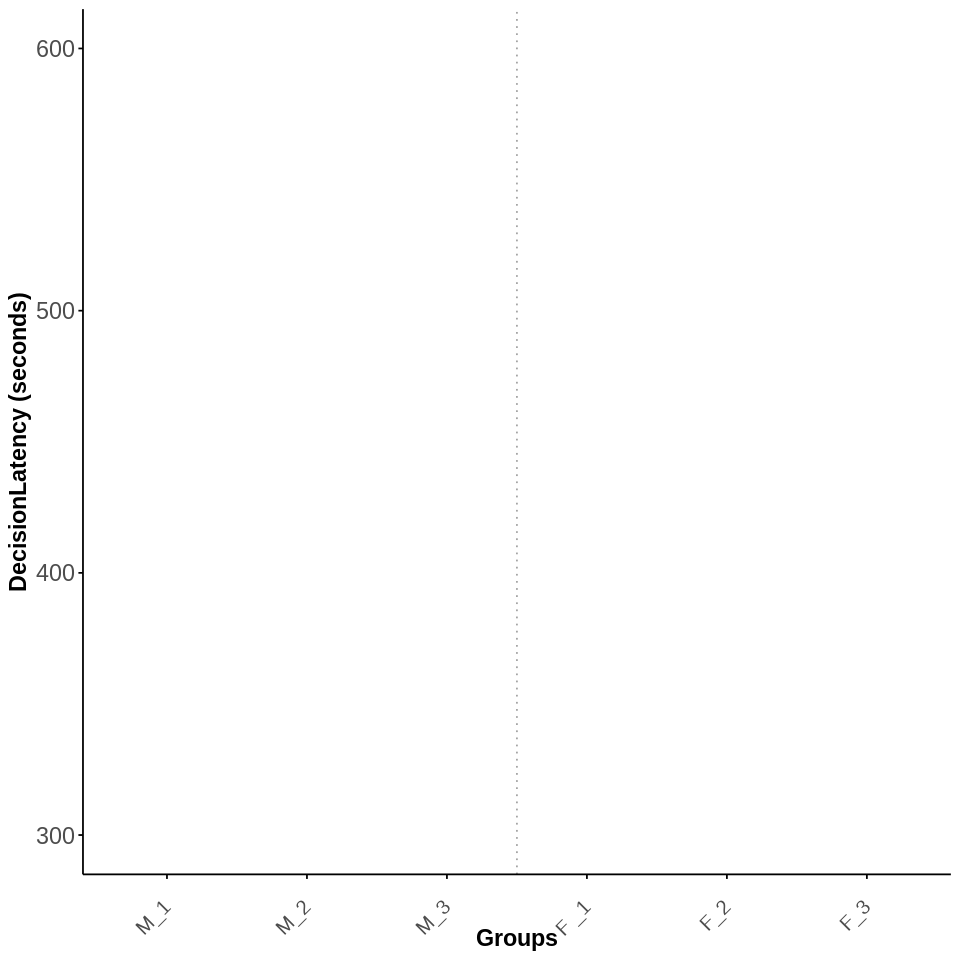

In [ ]:
# 确保过滤条件正确
df_filtered <- data %>%
  filter(Model_type != "Human") %>%  # 过滤掉 Human
  mutate(Time = as.numeric(Time))  # 确保Time是数值类型

# 检查是否有NA值被引入
if (any(is.na(df_filtered$Time))) {
  warning("Some Time values could not be converted to numeric and were set to NA")
}

library(ggplot2)
library(dplyr)

# 假设 df_filtered 已经被正确过滤和分组
df_filtered$Group <- factor(
  interaction(df_filtered$Sex, df_filtered$Model_type, sep = "_"),
  levels = c(
    "M_Purported Human", "M_Purported Rule-Based Agents", "M_Purported LLM Agents",
    "F_Purported Human", "F_Purported Rule-Based Agents", "F_Purported LLM Agents"
  )
)

# 计算每组的 Md, SD, AVG
stats <- df_filtered %>%
  group_by(Group) %>%
  summarise(
    Md = median(Time, na.rm = TRUE),
    SD = sd(Time, na.rm = TRUE),
    AVG = mean(Time, na.rm = TRUE),
    .groups = "drop"
  )

# 自定义颜色
custom_colors <- c(
  "M_Purported Human" = "#D3D8E0",
  "M_Purported Rule-Based Agents" = "#BAC4D3",
  "M_Purported LLM Agents" = "#97A8C0",
  "F_Purported Human" = "#E4D0D0",
  "F_Purported Rule-Based Agents" = "#DBB3B3",
  "F_Purported LLM Agents" = "#CF8D8D"
)

# 检查颜色和分组匹配
if (!all(levels(df_filtered$Group) %in% names(custom_colors))) {
  stop("Custom colors do not match the levels of Group.")
}

# 在原始代码中找到geom_boxplot部分，修改为：
p <- ggplot(df_filtered, aes(x = Group, y = Cooperate, fill = Group)) +
  stat_boxplot(
    geom = "errorbar",
    width = 0.15,
    size = 0.5,
    color = "black"
  ) +
  geom_boxplot(
    width = 0.2,
    alpha = 1,
    outlier.shape = NA
  ) +
  # 添加以下scale_x_discrete替换原来的
  scale_x_discrete(
    labels = c("M_1", "M_2", "M_3", "F_1", "F_2", "F_3"),
    expand = expansion(add = c(0.5, 1.5))  # 左边扩展0.5单位，右边扩展1.5单位
  ) +
  # 添加分组间隔线
  geom_vline(xintercept = 3.5, linetype = "dotted", color = "gray60", alpha = 0.9) +
  # 其他原有设置保持不变...

  # 自定义颜色
  scale_fill_manual(
    values = custom_colors,
    labels = c(
      "M_1: M_Purported Human",
      "M_2: M_Purported Rule-Based Agents",
      "M_3: M_Purported LLM Agents",
      "F_1: F _Purported Human",
      "F_2: F_Purported Rule-Based Agents",
      "F_3: F_Purported LLM Agents"
    )
  ) +
  # 自定义横坐标标签为 A, B, C, D, E, F
  scale_x_discrete(labels = c("M_1", "M_2", "M_3", "F _1", "F_2", "F_3")) +
  # 设置纵轴范围为 [0, 100]，去掉百分号
  scale_y_continuous(limits = c(300, 600), labels = scales::number_format(scale = 1)) +
  # 标题和坐标轴标签
  labs(
   # title = "Decision Latency by Gender and AI Declared Identity",
    x = "Groups",
    y = "DecisionLatency (seconds)",
    fill = "Groups"
  ) +

  # 修改主题
  theme_minimal() +
  theme(
    #text = element_text(family = "Arial"),
    plot.title = element_text(hjust = 0.2, size = 18, face = "bold"),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    axis.text.x = element_text(
      size = 12,
      angle = 45,       # 向左倾斜45度
      hjust = 1,        # 右对齐（使标签底部靠近刻度线）
      vjust = 0.5       # 垂直居中
  ),
    axis.text.y = element_text(size = 14),
    panel.grid = element_blank(),  # 去掉网格线
    legend.position = "top",  # 图例放在顶部
    legend.text = element_text(size = 10),  # 增大图例文本字体
    # 添加横轴和纵轴线
    axis.line = element_line(color = "black"),  # 绘制轴线
    axis.ticks = element_line(color = "black")  # 添加刻度线
  )

# 添加每组的统计量到图中，并移到箱线图下方
p <- p + geom_text(
  data = stats,
  aes(
    x = Group,
    y = 2,  # 将文字放在图中下方
    label = paste0(
      "Md=", round(Md, 2), "%\n",
      "SD=", round(SD, 2), "%\n",
      "AVG=", round(AVG, 2), "%"
    )  # 格式化显示数据，手动添加百分号
  ),
  inherit.aes = FALSE,  # 不继承其他美学映射
  color = "black",
  size = 4,
  hjust = 0.5,
)

options(repr.plot.width = 8, repr.plot.height = 8)  # 设置显示比例
print(p)  # 此时显示的图形会按比例调整

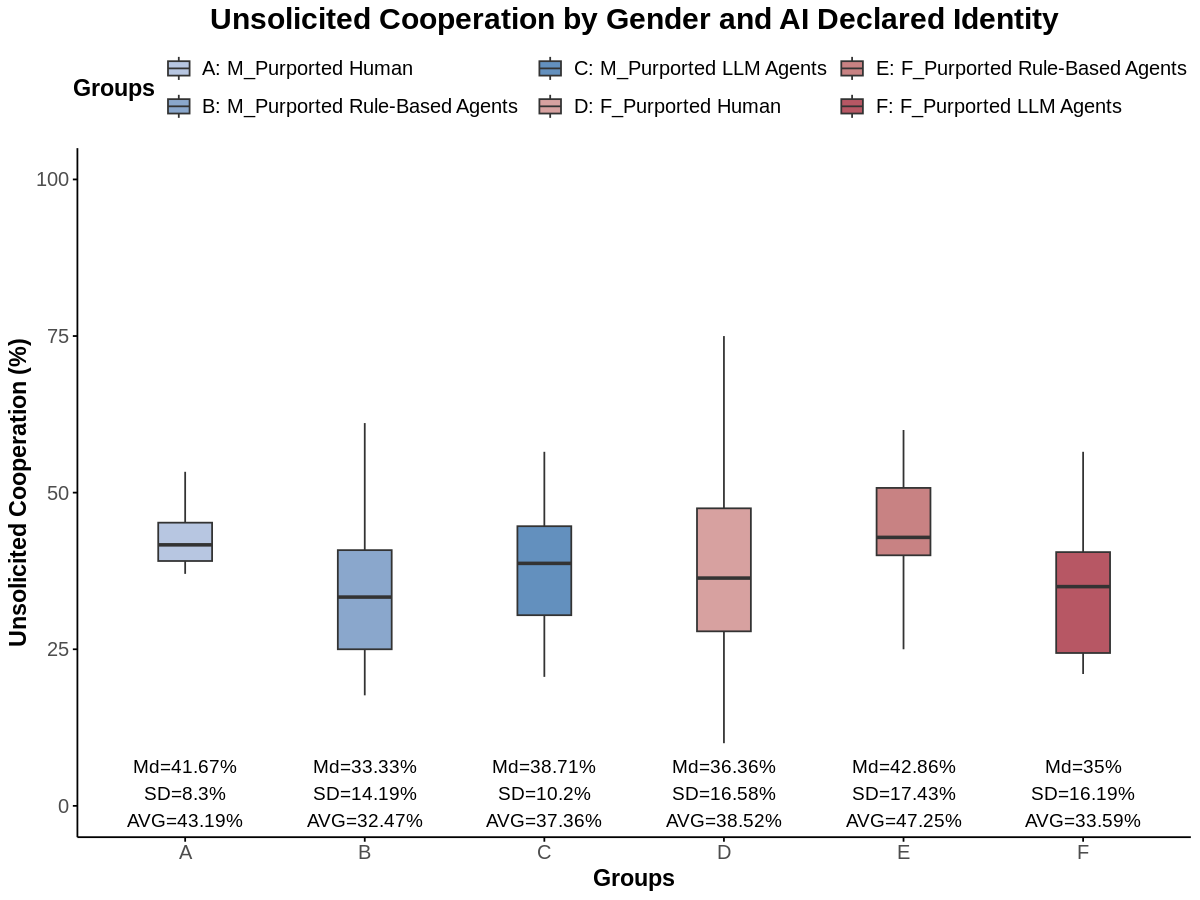

In [ ]:
# 确保过滤条件正确
df_filtered <- data %>%
  filter(Model_type != "Human")  # 过滤掉 Human

library(ggplot2)
library(dplyr)

# 假设 df_filtered 已经被正确过滤和分组
df_filtered$Group <- factor(
  interaction(df_filtered$Sex, df_filtered$Model_type, sep = "_"),
  levels = c(
    "M_Purported Human", "M_Purported Rule-Based Agents", "M_Purported LLM Agents",
    "F_Purported Human", "F_Purported Rule-Based Agents", "F_Purported LLM Agents"
  )
)

# 将 Be_Friendly 转换成百分比
df_filtered <- df_filtered %>%
  mutate(Be_Friendly = Be_Friendly * 100)

# 计算每组的 Md, SD, AVG (以百分数表示)
stats <- df_filtered %>%
  group_by(Group) %>%
  summarise(
    Md = median(Be_Friendly, na.rm = TRUE),
    SD = sd(Be_Friendly, na.rm = TRUE),
    AVG = mean(Be_Friendly, na.rm = TRUE),
    .groups = "drop"
  )

# 自定义颜色
custom_colors <- c(
  "M_Purported Human" = "#AABCDB",
  "M_Purported Rule-Based Agents" = "#7698C3",
  "M_Purported LLM Agents" = "#487DB2",
  "F_Purported Human" = "#D0908F",
  "F_Purported Rule-Based Agents" = "#BE6C6D",
  "F_Purported LLM Agents" = "#AA3A49"
)

# 检查颜色和分组匹配
if (!all(levels(df_filtered$Group) %in% names(custom_colors))) {
  stop("Custom colors do not match the levels of Group.")
}

# 绘制箱线图
p <- ggplot(df_filtered, aes(x = Group, y = Be_Friendly, fill = Group)) +
  # 绘制箱线图
  geom_boxplot(width = 0.3, alpha = 0.85, outlier.shape = NA) +
  # 自定义颜色
  scale_fill_manual(
    values = custom_colors,
    labels = c(
      "A: M_Purported Human",
      "B: M_Purported Rule-Based Agents",
      "C: M_Purported LLM Agents",
      "D: F_Purported Human",
      "E: F_Purported Rule-Based Agents",
      "F: F_Purported LLM Agents"
    )
  ) +
  # 自定义横坐标标签为 A, B, C, D, E, F
  scale_x_discrete(labels = c("A", "B", "C", "D", "E", "F")) +
  # 设置纵轴范围为 [0, 100]，去掉百分号
  scale_y_continuous(limits = c(0, 100), labels = scales::number_format(scale = 1)) +
  # 标题和坐标轴标签
  labs(
    title = "Unsolicited Cooperation by Gender and AI Declared Identity",
    x = "Groups",
    y = "Unsolicited Cooperation (%)",
    fill = "Groups"
  ) +
  # 修改主题
  theme_minimal() +
  theme(
    # 设置所有文本为Arial字体
    #text = element_text(family = "Arial"),
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    panel.grid = element_blank(),  # 去掉网格线
    legend.position = "top",  # 图例放在顶部
    legend.title = element_text(size = 14, face = "bold"),  # 增大图例标题字体
    legend.text = element_text(size = 12,),  # 增大图例文本字体
    # 添加横轴和纵轴线
    axis.line = element_line(color = "black"),  # 绘制轴线
    axis.ticks = element_line(color = "black")  # 添加刻度线
  )

# 添加每组的统计量到图中，并移到箱线图下方
p <- p + geom_text(
  data = stats,
  aes(
    x = Group,
    y = 2,  # 将文字放在图中下方
    label = paste0(
      "Md=", round(Md, 2), "%\n",
      "SD=", round(SD, 2), "%\n",
      "AVG=", round(AVG, 2), "%"
    )  # 格式化显示数据，手动添加百分号
  ),
  inherit.aes = FALSE,  # 不继承其他美学映射
  color = "black",
  size = 4,
  hjust = 0.5,
  #family = "Arial"  # 设置统计文本为Arial字体
)



options(repr.plot.width = 10, repr.plot.height = 7.5)  # 设置显示比例
print(p)  # 此时显示的图形会按比例调整


Warning message:
“Removed 88 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.g

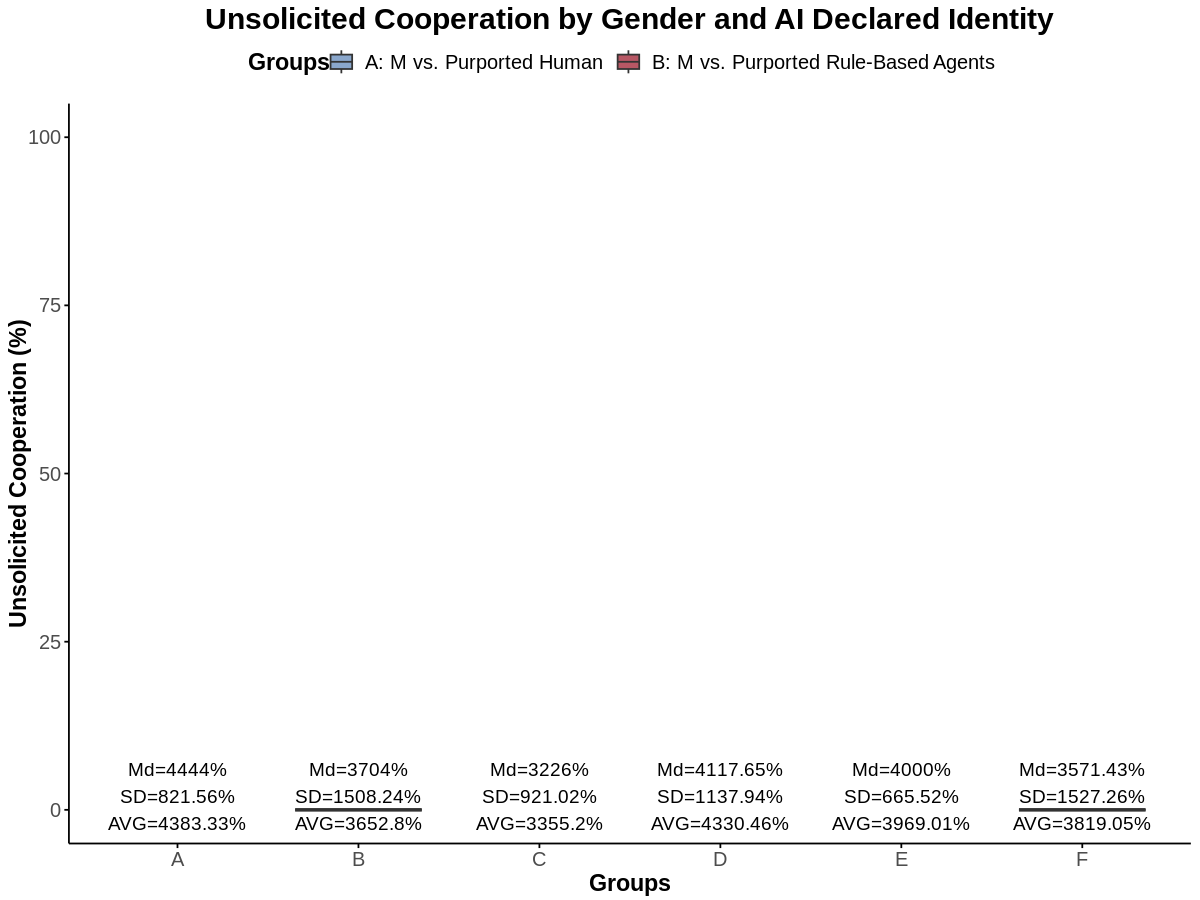

In [ ]:
# 确保过滤条件正确
df_filtered <- data %>%
  filter(Model_type != "Human")  # 过滤掉 Human

library(ggplot2)
library(dplyr)

# 假设 df_filtered 已经被正确过滤和分组
df_filtered$Group <- factor(
  interaction(df_filtered$Sex, df_filtered$Model_type, sep = "_"),
  levels = c(
    "M_Purported Human", "M_Purported Rule-Based Agents", "M_Purported LLM Agents",
    "F_Purported Human", "F_Purported Rule-Based Agents", "F_Purported LLM Agents"
  )
)

# 将 Be_Friendly 转换成百分比
df_filtered <- df_filtered %>%
  mutate(Repair_Effort = Repair_Effort * 100)

# 计算每组的 Md, SD, AVG (以百分数表示)
stats <- df_filtered %>%
  group_by(Group) %>%
  summarise(
    Md = median(Repair_Effort, na.rm = TRUE),
    SD = sd(Repair_Effort, na.rm = TRUE),
    AVG = mean(Repair_Effort, na.rm = TRUE),
    .groups = "drop"
  )

# 自定义颜色
custom_colors <- c(
  "M_Purported Human" = "#AABCDB",
  "M_Purported Rule-Based Agents" = "#7698C3",
  "M_Purported LLM Agents" = "#487DB2",
  "F_Purported Human" = "#D0908F",
  "F_Purported Rule-Based Agents" = "#BE6C6D",
  "F_Purported LLM Agents" = "#AA3A49"
)

# 检查颜色和分组匹配
if (!all(levels(df_filtered$Group) %in% names(custom_colors))) {
  stop("Custom colors do not match the levels of Group.")
}

# 绘制箱线图
p <- ggplot(df_filtered, aes(x = Group, y = Repair_Effort, fill = Group)) +
  # 绘制箱线图
  geom_boxplot(width = 0.7, alpha = 0.85, outlier.shape = NA) +
  # 自定义颜色
  scale_fill_manual(
    values = custom_colors,
    labels = c(
      "A: M vs. Purported Human",
      "B: M vs. Purported Rule-Based Agents",
      "C: M vs. Purported LLM Agents",
      "D: F vs. Purported Human",
      "E: F vs. Purported Rule-Based Agents",
      "F: F vs. Purported LLM Agents"
    )
  ) +
  # 自定义横坐标标签为 A, B, C, D, E, F
  scale_x_discrete(labels = c("A", "B", "C", "D", "E", "F")) +
  # 设置纵轴范围为 [0, 100]，去掉百分号
  scale_y_continuous(limits = c(0, 100), labels = scales::number_format(scale = 1)) +
  # 标题和坐标轴标签
  labs(
    title = "Unsolicited Cooperation by Gender and AI Declared Identity",
    x = "Groups",
    y = "Unsolicited Cooperation (%)",
    fill = "Groups"
  ) +
  # 修改主题
  theme_minimal() +
  theme(
    # 设置所有文本为Arial字体
    text = element_text(family = "Arial"),
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold", family = "Arial"),
    axis.title.x = element_text(size = 14, face = "bold", family = "Arial"),
    axis.title.y = element_text(size = 14, face = "bold", family = "Arial"),
    axis.text.x = element_text(size = 12, family = "Arial"),
    axis.text.y = element_text(size = 12, family = "Arial"),
    panel.grid = element_blank(),  # 去掉网格线
    legend.position = "top",  # 图例放在顶部
    legend.title = element_text(size = 14, face = "bold", family = "Arial"),  # 增大图例标题字体
    legend.text = element_text(size = 12, family = "Arial"),  # 增大图例文本字体
    # 添加横轴和纵轴线
    axis.line = element_line(color = "black"),  # 绘制轴线
    axis.ticks = element_line(color = "black")  # 添加刻度线
  )

# 添加每组的统计量到图中，并移到箱线图下方
p <- p + geom_text(
  data = stats,
  aes(
    x = Group,
    y = 2,  # 将文字放在图中下方
    label = paste0(
      "Md=", round(Md, 2), "%\n",
      "SD=", round(SD, 2), "%\n",
      "AVG=", round(AVG, 2), "%"
    )  # 格式化显示数据，手动添加百分号
  ),
  inherit.aes = FALSE,  # 不继承其他美学映射
  color = "black",
  size = 4,
  hjust = 0.5,
  family = "Arial"  # 设置统计文本为Arial字体
)

# 显示图形
print(p)

# 获取图形对象的尺寸信息
plot_size <- function(plot) {
  grid::grid.force()
  width <- grid::convertX(grid::unit(1, "npc"), "inches", valueOnly = TRUE)
  height <- grid::convertY(grid::unit(1, "npc"), "inches", valueOnly = TRUE)
  return(list(width = width, height = height))
}

# 计算默认尺寸
size <- plot_size(p)

ggsave(
  filename = "restoration.png",
  plot = p,
  width = size$width * 1.5,
  height = size$height * 1,
  dpi = 300,
  bg = "white"  # 确保背景是白色的
)


In [ ]:


# 读取数据并预处理
data <- read_excel("prisoner_data_analysis_1.xlsx", sheet = "R")
filtered_data <- subset(data, Model_type != "Human")
filtered_data$Time <- as.numeric(filtered_data$Time)
filtered_data <- filtered_data[!is.na(filtered_data$Time), ]

# 确保Model_type为因子（避免基线顺序混乱）
filtered_data$Model_type <- factor(filtered_data$Model_type)

# 拟合线性混合效应模型
model <- lmer(Time ~ Model_type + (1|ID), data = filtered_data)

# 计算所有两两比较的显著性
pairwise_comparison <- emmeans(model, pairwise ~ Model_type, adjust = "none")$contrasts
pairwise_results <- as.data.frame(pairwise_comparison)

# 添加显著性标记
pairwise_results$Sig <- ifelse(pairwise_results$p.value < 0.05, "*", "")

# 计算估计边际均值及置信区间
emm <- emmeans(model, ~ Model_type)
emm_results <- as.data.frame(emm)

# 输出结果
cat("============= 两两比较结果 =============\n")
print(pairwise_results)
cat("\n\n============= 边际均值及置信区间 =============\n")
print(emm_results)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed



============= 两两比较结果 =============
 contrast                                             estimate       SE df
 Purported Human - Purported LLM Agents               55.53333 11.36017 58
 Purported Human - (Purported Rule-Based Agents)      80.10000 11.36017 58
 Purported LLM Agents - (Purported Rule-Based Agents) 24.56667 11.36017 58
 t.ratio p.value Sig
   4.888  <.0001 *  
   7.051  <.0001 *  
   2.163  0.0347 *  

Degrees-of-freedom method: satterthwaite 


============= 边际均值及置信区间 =============
 Model_type                    emmean       SE   df lower.CL upper.CL
 Purported Human             454.1667 12.97884 49.4 428.0900 480.2433
 Purported LLM Agents        398.6333 12.97884 49.4 372.5567 424.7100
 Purported Rule-Based Agents 374.0667 12.97884 49.4 347.9900 400.1433

Degrees-of-freedom method: satterthwaite 
Confidence level used: 0.95 


In [ ]:
# 读取数据并预处理
data <- read_excel("prisoner_data_analysis_1.xlsx", sheet = "R")
filtered_data <- subset(data, Model_type != "Human")
filtered_data$Cooperate<- as.numeric(filtered_data$Cooperate)
filtered_data <- filtered_data[!is.na(filtered_data$Cooperate), ]

# 确保Model_type为因子（避免基线顺序混乱）
filtered_data$Model_type <- factor(filtered_data$Model_type)

# 拟合线性混合效应模型
model <- lmer(Cooperate ~ Model_type + (1|ID), data = filtered_data)

# 计算所有两两比较的显著性
pairwise_comparison <- emmeans(model, pairwise ~ Model_type, adjust = "none")$contrasts
pairwise_results <- as.data.frame(pairwise_comparison)

# 添加显著性标记
pairwise_results$Sig <- ifelse(pairwise_results$p.value < 0.05, "*", "")

# 计算估计边际均值及置信区间
emm <- emmeans(model, ~ Model_type)
emm_results <- as.data.frame(emm)

# 输出结果
cat("============= 两两比较结果 =============\n")
print(pairwise_results)
cat("\n\n============= 边际均值及置信区间 =============\n")
print(emm_results)

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed



============= 两两比较结果 =============
 contrast                                               estimate       SE df
 Purported Human - Purported LLM Agents               0.06333333 0.028353 58
 Purported Human - (Purported Rule-Based Agents)      0.06466667 0.028353 58
 Purported LLM Agents - (Purported Rule-Based Agents) 0.00133333 0.028353 58
 t.ratio p.value Sig
   2.234  0.0294 *  
   2.281  0.0263 *  
   0.047  0.9627    

Degrees-of-freedom method: satterthwaite 


============= 边际均值及置信区间 =============
 Model_type                     emmean         SE    df  lower.CL  upper.CL
 Purported Human             0.5400000 0.02535732 67.91 0.4893991 0.5906009
 Purported LLM Agents        0.4766667 0.02535732 67.91 0.4260657 0.5272676
 Purported Rule-Based Agents 0.4753333 0.02535732 67.91 0.4247324 0.5259343

Degrees-of-freedom method: satterthwaite 
Confidence level used: 0.95 


In [ ]:
# 计算每组的中位数和标准差
group_stats <- aggregate(Time ~ Sex, data = filtered_data, function(x) c(median = median(x), sd = sd(x)))
group_stats <- do.call(data.frame, group_stats)  # 转换为数据框格式
colnames(group_stats) <- c("Sex", "Median", "SD")  # 重命名列

# 输出结果：每组的中位数和标准差
cat("\n============= 每组的中位数和标准差 =============\n")
print(group_stats)



============= 每组的中位数和标准差 =============
  Sex Median       SD
1   F    368 48.16003
2   M    428 87.58985


In [ ]:


# 读取数据并预处理
data <- read_excel("prisoner_data_analysis_1.xlsx", sheet = "R")
filtered_data <- subset(data, Model_type != "Human")
filtered_data$Time <- as.numeric(filtered_data$Time)
filtered_data <- filtered_data[!is.na(filtered_data$Time), ]

# 确保Sex为因子（避免基线顺序混乱）
filtered_data$Sex <- factor(filtered_data$Sex)

# 拟合线性混合效应模型
model <- lmer(Time ~ Sex+ (1|ID), data = filtered_data)

# 计算所有两两比较的显著性
pairwise_comparison <- emmeans(model, pairwise ~ Sex, adjust = "none")$contrasts
pairwise_results <- as.data.frame(pairwise_comparison)

# 添加显著性标记
pairwise_results$Sig <- ifelse(pairwise_results$p.value < 0.05, "*", "")

# 计算估计边际均值及置信区间
emm <- emmeans(model, ~ Sex)
emm_results <- as.data.frame(emm)

# 输出结果
cat("============= 两两比较结果 =============\n")
print(pairwise_results)
cat("\n\n============= 边际均值及置信区间 =============\n")
print(emm_results)

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed



============= 两两比较结果 =============
 contrast  estimate       SE df t.ratio p.value Sig
 F - M    -67.02222 18.95312 28  -3.536  0.0014 *  

Degrees-of-freedom method: satterthwaite 


============= 边际均值及置信区间 =============
 Sex   emmean       SE df lower.CL upper.CL
 F   375.4444 13.40188 28 347.9919 402.8969
 M   442.4667 13.40188 28 415.0142 469.9192

Degrees-of-freedom method: satterthwaite 
Confidence level used: 0.95 


In [ ]:
# 读取数据并预处理
data <- read_excel("prisoner_data_analysis_1.xlsx", sheet = "R")
filtered_data <- subset(data, Model_type != "Human")
filtered_data$Repair_Effort<- as.numeric(filtered_data$Repair_Effort)
filtered_data <- filtered_data[!is.na(filtered_data$Repair_Effort), ]

# 确保Model_type为因子（避免基线顺序混乱）
filtered_data$Model_type <- factor(filtered_data$Model_type)

# 拟合线性混合效应模型
model <- lmer(Repair_Effort ~ Model_type + (1|ID), data = filtered_data)

# 计算所有两两比较的显著性
pairwise_comparison <- emmeans(model, pairwise ~ Model_type, adjust = "none")$contrasts
pairwise_results <- as.data.frame(pairwise_comparison)

# 添加显著性标记
pairwise_results$Sig <- ifelse(pairwise_results$p.value < 0.05, "*", "")

# 计算估计边际均值及置信区间
emm <- emmeans(model, ~ Model_type)
emm_results <- as.data.frame(emm)

# 输出结果
cat("============= 两两比较结果 =============\n")
print(pairwise_results)
cat("\n\n============= 边际均值及置信区间 =============\n")
print(emm_results)

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed



============= 两两比较结果 =============
 contrast                                                estimate         SE df
 Purported Human - Purported LLM Agents                0.07697738 0.02799566 58
 Purported Human - (Purported Rule-Based Agents)       0.05459916 0.02799566 58
 Purported LLM Agents - (Purported Rule-Based Agents) -0.02237822 0.02799566 58
 t.ratio p.value Sig
   2.750  0.0079 *  
   1.950  0.0560    
  -0.799  0.4274    

Degrees-of-freedom method: satterthwaite 


============= 边际均值及置信区间 =============
 Model_type                     emmean         SE    df  lower.CL  upper.CL
 Purported Human             0.4356898 0.02076524 85.58 0.3944069 0.4769726
 Purported LLM Agents        0.3587124 0.02076524 85.58 0.3174295 0.3999952
 Purported Rule-Based Agents 0.3810906 0.02076524 85.58 0.3398078 0.4223734

Degrees-of-freedom method: satterthwaite 
Confidence level used: 0.95 
